# Logistic Regression Assignment

## Lead Scoring Case Study

### Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

 
**The company wants :**

- How well those lead variables describe the course demands.
- The target lead conversion rate to be around 80%.


# Data
The company has provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not.

# Importing Important libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor



pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

## Reading and Understanding Data

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
df.shape


(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


**Scrutiny**
* Significant number of columns have null values. We shall drop these.
* `Prospect ID` and `Lead Number` both serve the same purpose. We will drop `Prospect ID`
* Few categorical columns have "Select" in their entries. Those select are essentially null values because Select appears when someone does not select anything from the dropdown

# Data Cleaning

In [6]:
df=df.drop_duplicates()


In [7]:
df.drop('Prospect ID', axis = 1, inplace = True)

In [8]:
# Replace "Select" category with null values
df_obj = df.select_dtypes(include='object')

# Find out columns that have "Select"
select = lambda x: x.str.contains('Select', na=False)
list_select = df_obj.columns[df_obj.apply(select).any()].tolist()
print (list_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [9]:
#There are 4 columns that contains `Select`, which are effectively null values.
df[list_select] = df[list_select].replace('Select', np.NaN)


### Handle null values and Insignificant columns

- Given there are a number of columns with very high number of null entries, let's calculate the percentage of null values in each column, and take a decision from there.
- Furthermore, we can also drop Sales generated columns because those are the data entries that are made after the sales team has connected with the student. Those data have no bearing to the purpose of our model ie. providing lead score. The columns are
    * `tags`
    * `lead_quality`
    * all `asymmetrique` columns
    * `last_activity`
    * `last_notable_activity`

In [10]:
null= df.isnull().sum()/len(df)*100
null.sort_values(ascending=False)

How did you hear about X Education              78.46
Lead Profile                                    74.19
Lead Quality                                    51.59
Asymmetrique Activity Index                     45.65
Asymmetrique Profile Score                      45.65
Asymmetrique Profile Index                      45.65
Asymmetrique Activity Score                     45.65
City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
I agree to pay the amount through cheque         0.00
A free copy of Mastering The

**Scrutiny**: There are quite a few columns with high number of missing data. Since there are no ways to get data, we can drop all those columns that have null values > 40%

In [11]:
def bins (df, perc=40):
    null= df.isnull().sum()/len(df)*100
    null = list(null[null.values>=perc].index)
    df.drop(labels= null, axis=1, inplace=True)
    return df

In [12]:
df = bins(df,perc=40)
df.shape

(9240, 29)

In [13]:
# Handling some of the Nomenclature
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['lead_number', 'lead_origin', 'lead_source', 'do_not_email',
       'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'city', 'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [14]:
# shorten column names
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.head()

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [15]:
df.drop(['tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)


In [16]:
print(df.shape)
print(df.head())

(9240, 26)
   lead_number              lead_origin     lead_source do_not_email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  do_not_call  converted  total_visits  time_on_website  page_views_per_visit  \
0          No          0          0.00                0                  0.00   
1          No          0          5.00              674                  2.50   
2          No          1          2.00             1532                  2.00   
3          No          0          1.00              305                  1.00   
4          No          1          2.00             1428                  1.00   

  country           specialization  occupation  course_selection_reas

In [17]:
null= df.isnull().sum()/len(df)*100
null.sort_values(ascending=False)

city                           39.71
specialization                 36.58
course_selection_reason        29.32
occupation                     29.11
country                        26.63
total_visits                    1.48
page_views_per_visit            1.48
lead_source                     0.39
lead_number                     0.00
newspaper                       0.00
cheque_payment                  0.00
dm_content_updates              0.00
supply_chain_content_updates    0.00
courses_updates                 0.00
through_recommendations         0.00
digital_advertisement           0.00
search                          0.00
x_education_forums              0.00
newspaper_article               0.00
magazine                        0.00
lead_origin                     0.00
time_on_website                 0.00
converted                       0.00
do_not_call                     0.00
do_not_email                    0.00
mastering_interview             0.00
dtype: float64

**Scrutiny**
<br>There are five columns that still have high null values: `country`, `specialization`, `occupation`, `course_selection_reason`, and `city`. We will look at them individually and determine whether any kind of imputation can be done accordingly.

## We will proceed with the most null value containing column i.e. CITY

In [18]:
df.city.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: city, dtype: float64

In [19]:
df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'), 
       'city'] = 'MH Cities'

df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities') , 
       'city'] = 'Non-MH Cities'

In [20]:
df.city.value_counts(normalize = True) * 100


Mumbai          57.84
MH Cities       21.70
Non-MH Cities   20.46
Name: city, dtype: float64

In [21]:
# impute proportionately
df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'MH Cities', 
                                                                    'Non-MH Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

## Specialization

In [22]:
df.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

In [23]:
# categorize all management courses
df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') | 
       (df.specialization == 'Marketing Management') |  (df.specialization == 'Operations Management') |
       (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management') |
       (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management') |
       (df.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# categorize all business courses
df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business') | 
       (df.specialization == 'Rural and Agribusiness') | (df.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

# categorize all industrial courses
df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Media and Advertising') |
       (df.specialization == 'Travel and Tourism') | (df.specialization == 'Services Excellence') |
       (df.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [24]:
df.specialization.value_counts(normalize = True) * 100

Management Specializations   72.58
Industry Specializations     15.29
Business Specializations     12.13
Name: specialization, dtype: float64

In [25]:
# impute proportionately
df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df))))

## Course Selection Reason

In [26]:
df.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

**Scrutiny**
<br> The distribution of the data is very heavily skewed, The column mainly only consists of just one category i.e.
Better Career Prospects which i think would be hardly be of any use in our model. we will drop this column.

In [27]:
df.drop('course_selection_reason', axis = 1, inplace = True)

## Occupation Column

In [28]:
df.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

We will maintain the proportions while imputing the values

In [29]:
# combine low representing categories
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'
df.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student and Others      2.64
Name: occupation, dtype: float64

In [30]:
# impute proportionately
df['occupation'] = df.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

## Country Column

In [31]:
df.country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

Safe to drop the column as only INDIA mainly constitutes the whole column and the majority of the business is run here.

In [32]:
df.drop('country', axis = 1, inplace = True)

In [33]:
df.shape

(9240, 24)

## Handling Categorical Columns
Here we can either impute missing values or merge categories with low representation as one, for if we continue with such columns they would hamper in the formation of model as too many wanted variable will try to find representation in the analysis.

In [34]:
null= df.isnull().sum()/len(df)*100
null.sort_values(ascending=False)

total_visits                   1.48
page_views_per_visit           1.48
lead_source                    0.39
lead_number                    0.00
x_education_forums             0.00
cheque_payment                 0.00
city                           0.00
dm_content_updates             0.00
supply_chain_content_updates   0.00
courses_updates                0.00
through_recommendations        0.00
digital_advertisement          0.00
newspaper                      0.00
magazine                       0.00
newspaper_article              0.00
lead_origin                    0.00
search                         0.00
occupation                     0.00
specialization                 0.00
time_on_website                0.00
converted                      0.00
do_not_call                    0.00
do_not_email                   0.00
mastering_interview            0.00
dtype: float64

In [35]:
# determine unique values for all object datatype columns
unique = []
for x, y in df.select_dtypes(include='object').nunique().to_dict().items():
    unique.append('{} = {}'.format(x,y))
    

In [36]:
print(unique)

['lead_origin = 5', 'lead_source = 21', 'do_not_email = 2', 'do_not_call = 2', 'specialization = 3', 'occupation = 3', 'search = 2', 'magazine = 1', 'newspaper_article = 2', 'x_education_forums = 2', 'newspaper = 2', 'digital_advertisement = 2', 'through_recommendations = 2', 'courses_updates = 1', 'supply_chain_content_updates = 1', 'dm_content_updates = 1', 'city = 3', 'cheque_payment = 1', 'mastering_interview = 2']


Lead origin and lead source have multiple unique values

In [37]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

In [38]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df.loc[(df.lead_origin == 'Lead Add Form') | (df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

In [39]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: lead_source, dtype: float64

In [40]:
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [41]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

In [42]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google               31.43
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Other Social Sites    3.79
Name: lead_source, dtype: float64

### Handle Binary columns
Now in other binary columns:
* Drop those columns that have significant data imbalance
* Drop all those columns that have only 1 unique entry

as they will not be used as definitive factors.

In [43]:
# determine unique values
binary=[]
for x, y in df.select_dtypes(include='object').nunique().to_dict().items():
    binary.append('{} = {}'.format(x,y))

In [44]:
print(binary)

['lead_origin = 3', 'lead_source = 6', 'do_not_email = 2', 'do_not_call = 2', 'specialization = 3', 'occupation = 3', 'search = 2', 'magazine = 1', 'newspaper_article = 2', 'x_education_forums = 2', 'newspaper = 2', 'digital_advertisement = 2', 'through_recommendations = 2', 'courses_updates = 1', 'supply_chain_content_updates = 1', 'dm_content_updates = 1', 'city = 3', 'cheque_payment = 1', 'mastering_interview = 2']


**Scrutiny**
* The following columns can be dropped as they have just 1 unique values
    * `magazine`
    * `course_updates`
    * `supply_chain_content_updates`
    * `dm_content_updates`
    * `cheque_payment`
    
 Let's now check the data imbalance for the all of the columns

In [45]:
df_bin = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.06
Yes    7.94
Name: do_not_email, dtype: float64

No    99.98
Yes    0.02
Name: do_not_call, dtype: float64

No    99.85
Yes    0.15
Name: search, dtype: float64

No    99.98
Yes    0.02
Name: newspaper_article, dtype: float64

No    99.99
Yes    0.01
Name: x_education_forums, dtype: float64

No    99.99
Yes    0.01
Name: newspaper, dtype: float64

No    99.96
Yes    0.04
Name: digital_advertisement, dtype: float64

No    99.92
Yes    0.08
Name: through_recommendations, dtype: float64

No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64



In [46]:
#dropping insignificant columns
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

df.drop(drop_bin, axis = 1, inplace = True)

In [47]:
df.shape

(9240, 12)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   int64  
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9103 non-null   float64
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9103 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 938.4+ KB


### Handle Numerical columns

In [49]:
df.lead_number = df.lead_number.astype('object')
df.total_visits.fillna(df.total_visits.median(), inplace=True)
df.total_visits = df.total_visits.astype('int')
df.page_views_per_visit.fillna(df.page_views_per_visit.median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int64  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 938.4+ KB


## **SCRUTINY**
`lead_number` column is a unique identifier for each leads and the numbers in the column can hamper with our model hence, We should change it to object.
For `total_visits` column we need to handle the missing values, and can convert the datatype to integer since visits can't be decimal.
Same for `page_views_per_visit` column we need to handle the missing values.

# Exploratory Data Analysis

In [50]:
df.columns

Index(['lead_number', 'lead_origin', 'lead_source', 'do_not_email',
       'converted', 'total_visits', 'time_on_website', 'page_views_per_visit',
       'specialization', 'occupation', 'city', 'mastering_interview'],
      dtype='object')

Text(0.5, 1.0, 'Time spent on website')

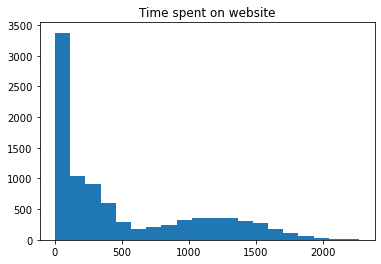

In [51]:
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

The peak seems unusually high, we will check for outliers in similar columns.

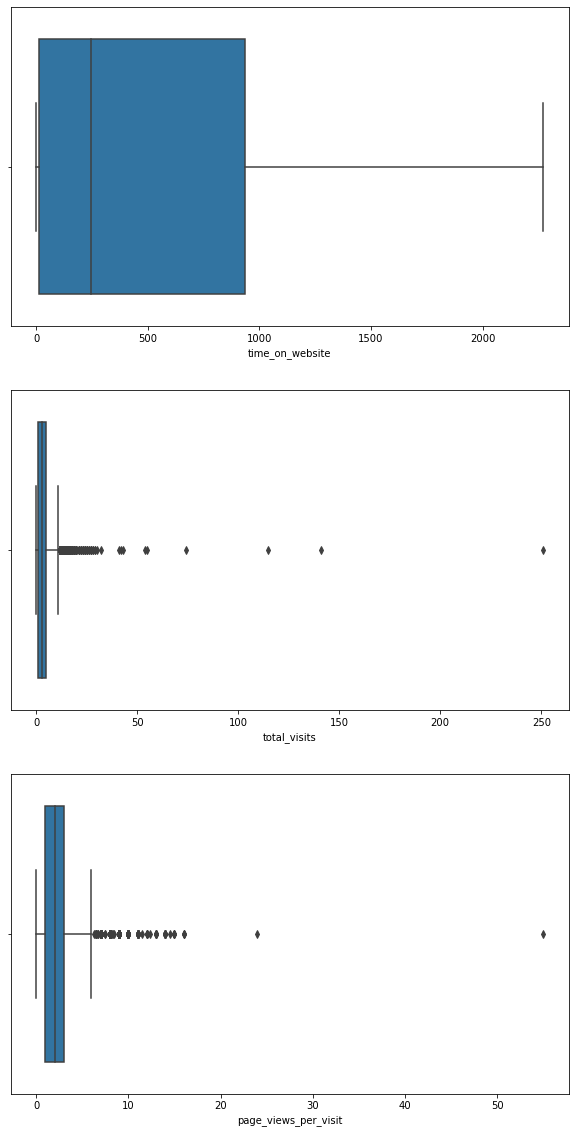

In [52]:
plt.figure(figsize = (10, 20))

plt.subplot(3,1,1)
sns.boxplot(df.time_on_website)

plt.subplot(3,1,2)
sns.boxplot(df.total_visits)

plt.subplot(3,1,3)
sns.boxplot(df.page_views_per_visit)
plt.show()

**Scrutiny**

* Looking at both the box plots, there are upper bound outliers in both `total_visits` and `page_views_per_visit` columns.

### Categorical columns

In [53]:
df.columns

Index(['lead_number', 'lead_origin', 'lead_source', 'do_not_email',
       'converted', 'total_visits', 'time_on_website', 'page_views_per_visit',
       'specialization', 'occupation', 'city', 'mastering_interview'],
      dtype='object')

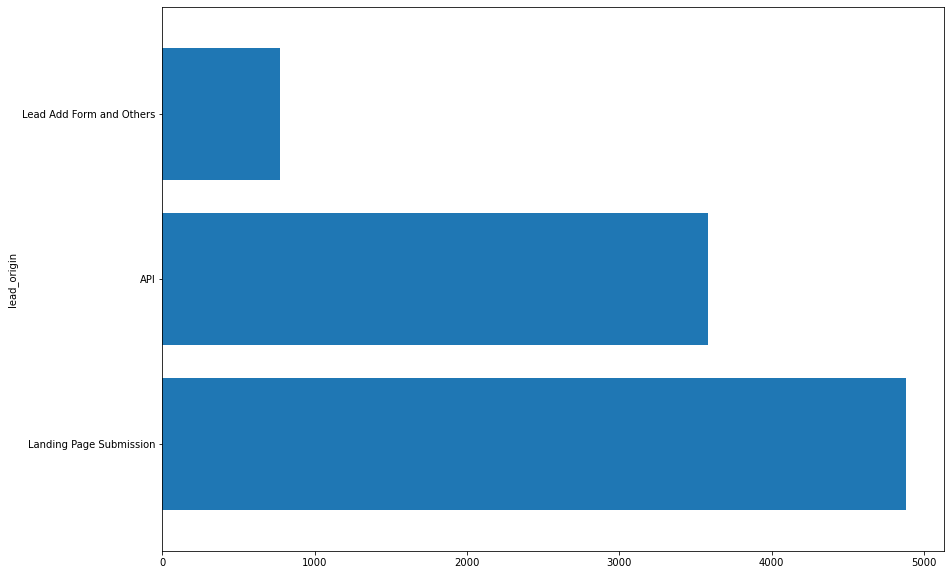

In [54]:
plt.figure(figsize = (14, 10))

df.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot( kind='barh', width = 0.8)
plt.show()

# Lead Source

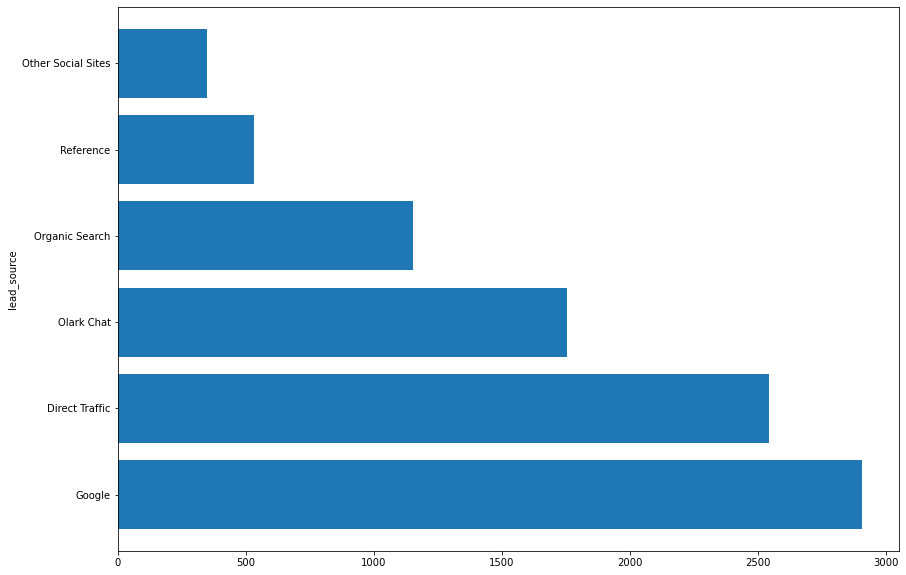

In [55]:
plt.figure(figsize = (14, 10))

df.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8)
plt.show()

# Specialisation

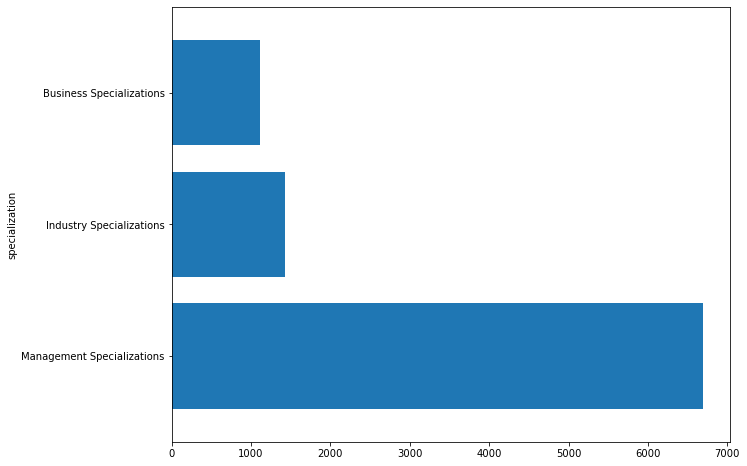

In [56]:
plt.figure(figsize = (10, 8))

df.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8) 
plt.show()

# Occupation

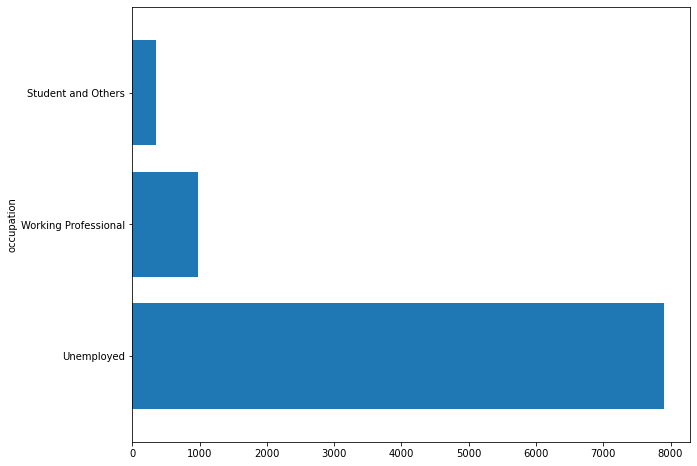

In [57]:
plt.figure(figsize = (10, 8))

df.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8) 
plt.show()

# CITY

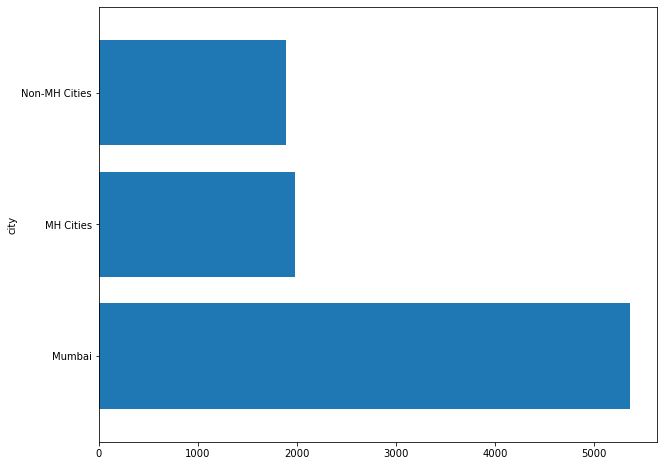

In [58]:
plt.figure(figsize = (10, 8))

df.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8) 
plt.show()

# DO NOT EMAIL

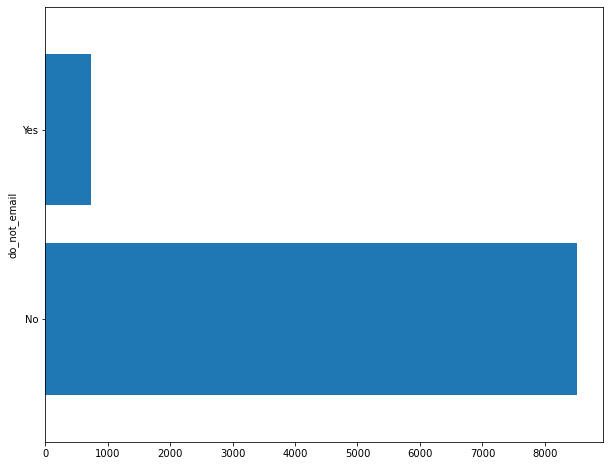

In [59]:
plt.figure(figsize = (10, 8))

df.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8) 
plt.show()

## Data Preparation

We have only 2 binary columns: `do_not_email` & `mastering_interview`

In [60]:
binlist = ['do_not_email', 'mastering_interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[binlist] = df[binlist].apply(binary_map)
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.00,Industry Specializations,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,5,674,2.50,Management Specializations,Unemployed,Non-MH Cities,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,Industry Specializations,Unemployed,Mumbai,0


### Creating dummy variable for categorical columns

Categorical columns are: `lead_origin`, `lead_source`, `specialization`, `occupation`, `city`

In [61]:
dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)
df = pd.concat([df, dummy1], axis=1)
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)
df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Mumbai,city_Non-MH Cities
0,660737,0,0,0,0,0.00,0,0,0,0,1,0,0,0,1,0,1,0,1,0
1,660728,0,0,5,674,2.50,0,0,0,0,0,1,0,0,0,1,1,0,0,1
2,660727,0,1,2,1532,2.00,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,660719,0,0,1,305,1.00,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,660681,0,1,2,1428,1.00,0,1,0,1,0,0,0,0,1,0,1,0,1,0


Here what we did was turn the binary or 2 category containing column to 1 or 0 according to their respective data entry.
Also we got dummy variables for our other categorical columns including `do_not_email` & `mastering_interview`

### Test-Train Split

In [62]:
# Putting feature variable to X
X = df.drop(['lead_number', 'converted'], axis=1)

X.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Mumbai,city_Non-MH Cities
0,0,0,0,0.00,0,0,0,0,1,0,0,0,1,0,1,0,1,0
1,0,5,674,2.50,0,0,0,0,0,1,0,0,0,1,1,0,0,1
2,0,2,1532,2.00,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,305,1.00,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,0,2,1428,1.00,0,1,0,1,0,0,0,0,1,0,1,0,1,0


In [63]:
# Putting response variable to y
y = df['converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### Feature Scaling

In [65]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Mumbai,city_Non-MH Cities
1871,0,-0.66,-0.89,-1.09,0,0,0,0,1,0,0,0,0,1,1,0,0,1
6795,0,0.10,0.01,-0.47,1,1,0,0,0,0,0,0,0,1,1,0,0,1
3516,0,0.29,-0.69,0.07,0,0,0,0,1,0,0,0,1,0,1,0,1,0
8105,0,0.29,1.37,1.23,0,1,0,1,0,0,0,0,1,0,1,0,1,0
3934,0,-0.66,-0.89,-1.09,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [66]:
# checking the conversion rate
conversion = (sum(df['converted'])/len(df['converted'].index))*100
conversion

38.53896103896104

The conversion rate is still very low. Maybe we can find some correlations.

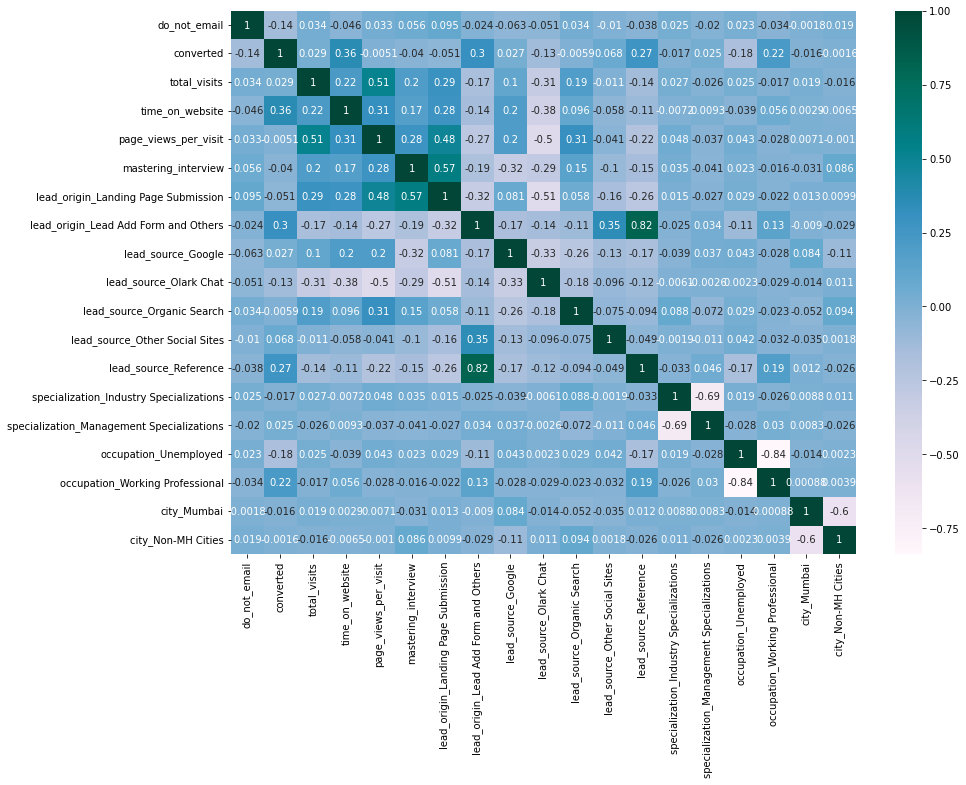

In [67]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,10))       
sns.heatmap(df.corr(),annot = True, cmap="PuBuGn")
plt.show()

In [68]:
# Drop highly correlated dummy variables
X_test.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

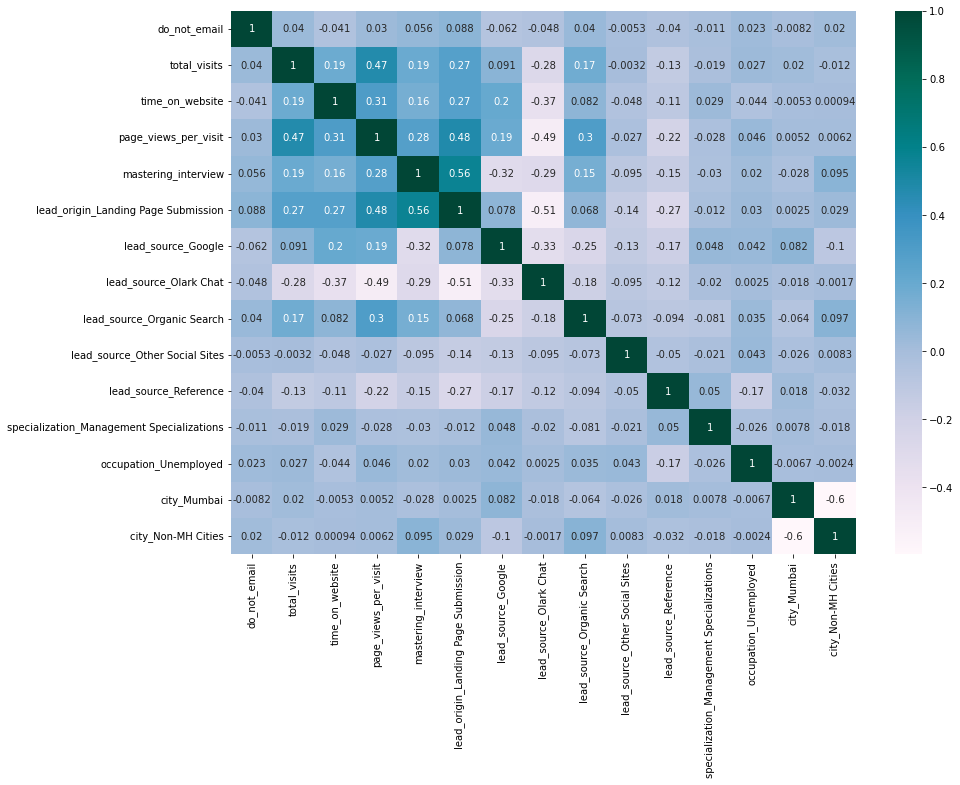

In [69]:
## lets check the correlation matrix again
plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="PuBuGn")
plt.show()

## Model Building

In [70]:
# Logistic regression model
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3296.6
Date:                Mon, 12 Sep 2022   Deviance:                       6593.3
Time:                        23:17:31   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.1865      0.154     -1.212      0.225      -0.488       0.115
do_not_email                                 -1.2446      0.145     -8.610      0.000      -1.528      -0.961
total_visits                                  0.0905      0.037      2.472      0.013       0.019       0.162
time_on_website                               1.0444      0.036     29.350      0.000       0.975       1.114
page_views_per_visit                         -0.1314      0.045     -2.920      0.004      -0.220      -0.043
mastering_interview                           0.0227      0.094      0.242      0.808      -0.161       0.207
lead_origin_Landing Page Submission          -0.0220      0.092     -0.239      0.811      -0.202       0.158
lead_source_Google                            0.3929      0.100      3.910      0.000       0.196       0.590
lead_source_Olark Chat                        0.6572      0.136      4.826      0.000       0.390       0.924
lead_source_Organic Search                    0.2585      0.115      2.243      0.025       0.033       0.484
lead_source_Other Social Sites                1.6423      0.175      9.379      0.000       1.299       1.985
lead_source_Reference                         3.9512      0.221     17.888      0.000       3.518       4.384
specialization_Management Specializations     0.0115      0.068      0.168      0.866      -0.123       0.146
occupation_Unemployed                        -0.9568      0.086    -11.148      0.000      -1.125      -0.789
city_Mumbai                                  -0.0687      0.077     -0.897      0.370      -0.219       0.081
city_Non-MH Cities                            0.0368      0.094      0.392      0.695      -0.147       0.221
=============================================================================================================
"""

### Feature selection using RFE

In [71]:
logreg = LogisticRegression()

rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [72]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True, False, False])

In [73]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('mastering_interview', False, 6),
 ('lead_origin_Landing Page Submission', False, 3),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', True, 1),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Management Specializations', False, 5),
 ('occupation_Unemployed', True, 1),
 ('city_Mumbai', False, 2),
 ('city_Non-MH Cities', False, 4)]

In [74]:
col = X_train.columns[rfe.support_]

In [75]:
X_train.columns[~rfe.support_]

Index(['mastering_interview', 'lead_origin_Landing Page Submission',
       'specialization_Management Specializations', 'city_Mumbai',
       'city_Non-MH Cities'],
      dtype='object')

# Model 2

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logreg2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3297.7
Date:                Mon, 12 Sep 2022   Deviance:                       6595.5
Time:                        23:17:31   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.2104      0.095     -2.218      0.027      -0.396      -0.024
do_not_email                      -1.2454      0.144     -8.624      0.000      -1.528      -0.962
total_visits                       0.0891      0.036      2.446      0.014       0.018       0.160
time_on_website                    1.0456      0.036     29.408      0.000       0.976       1.115
page_views_per_visit              -0.1341      0.044     -3.076      0.002      -0.220      -0.049
lead_source_Google                 0.3758      0.079      4.756      0.000       0.221       0.531
lead_source_Olark Chat             0.6561      0.111      5.931      0.000       0.439       0.873
lead_source_Organic Search         0.2680      0.107      2.494      0.013       0.057       0.479
lead_source_Other Social Sites     1.6446      0.157     10.493      0.000       1.337       1.952
lead_source_Reference              3.9460      0.206     19.199      0.000       3.543       4.349
occupation_Unemployed             -0.9561      0.086    -11.147      0.000      -1.124      -0.788
==================================================================================================
"""

In [77]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.21
6795   0.25
3516   0.23
8105   0.62
3934   0.21
4844   0.85
3297   0.16
8071   0.97
987    0.76
7423   0.79
dtype: float64

In [78]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20602716, 0.25191257, 0.22846796, 0.62201767, 0.20602716,
       0.85419909, 0.15795073, 0.96999279, 0.76016361, 0.78893869])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [79]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['lead_number'] = y_train.index
y_train_pred_final.head()

,converted,Convert_Prob,lead_number
0,0,0.21,1871
1,0,0.25,6795
2,0,0.23,3516
3,0,0.62,8105
4,0,0.21,3934


##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [80]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,converted,Convert_Prob,lead_number,predicted
0,0,0.21,1871,0
1,0,0.25,6795,0
2,0,0.23,3516,0
3,0,0.62,8105,1
4,0,0.21,3934,0


In [81]:
from sklearn import metrics

In [82]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3490  512]
 [1026 1440]]


    # Predicted     not_churn    churn
    # Actual
    # not_churn        3491      511
    # churn            1035      1431 

In [83]:
# overall accuracy
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)*100)

76.22139764996908


### We need this to be 80% or somewhere near 80%

Let's check the vif's

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,occupation_Unemployed,2.84
5,lead_source_Olark Chat,1.95
4,lead_source_Google,1.80
3,page_views_per_visit,1.79
6,lead_source_Organic Search,1.38
1,total_visits,1.30
2,time_on_website,1.21
8,lead_source_Reference,1.17
7,lead_source_Other Social Sites,1.11
0,do_not_email,1.09


Although all the VIF's seem to be in acceptible ranges,but for a check we will run a model by removing the column with the highest VIF i.e. `occupation_Unemployed`. So lets see what cause and efect this has on our model.	

In [85]:
col = col.drop('occupation_Unemployed', 1)
col

Index(['do_not_email', 'total_visits', 'time_on_website',
       'page_views_per_visit', 'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Other Social Sites',
       'lead_source_Reference'],
      dtype='object')

# MODEL 3

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logreg3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3360.3
Date:                Mon, 12 Sep 2022   Deviance:                       6720.5
Time:                        23:17:31   Pearson chi2:                 6.61e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0152      0.062    -16.371      0.000      -1.137      -0.894
do_not_email                      -1.2374      0.144     -8.618      0.000      -1.519      -0.956
total_visits                       0.0868      0.036      2.388      0.017       0.016       0.158
time_on_website                    1.0586      0.035     29.925      0.000       0.989       1.128
page_views_per_visit              -0.1295      0.043     -3.009      0.003      -0.214      -0.045
lead_source_Google                 0.3425      0.078      4.389      0.000       0.190       0.495
lead_source_Olark Chat             0.6766      0.109      6.187      0.000       0.462       0.891
lead_source_Organic Search         0.2295      0.106      2.168      0.030       0.022       0.437
lead_source_Other Social Sites     1.5553      0.155     10.026      0.000       1.251       1.859
lead_source_Reference              4.0968      0.204     20.127      0.000       3.698       4.496
==================================================================================================
"""

In [87]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.23284848, 0.28100956, 0.25837106, 0.65452223, 0.23284848,
       0.72838992, 0.17232305, 0.94363906, 0.77235734, 0.81162705])

In [88]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [89]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,converted,Convert_Prob,lead_number,predicted
0,0,0.23,1871,0
1,0,0.28,6795,0
2,0,0.26,3516,0
3,0,0.65,8105,1
4,0,0.23,3934,0


In [90]:
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7753555967841682


In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,page_views_per_visit,1.77
5,lead_source_Olark Chat,1.40
1,total_visits,1.30
2,time_on_website,1.21
6,lead_source_Organic Search,1.14
4,lead_source_Google,1.08
8,lead_source_Reference,1.08
0,do_not_email,1.04
7,lead_source_Other Social Sites,1.01


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

## Metrics beyond simply accuracy

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.583941605839416

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.872063968015992

In [95]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.127936031984008


In [96]:
# positive predictive value 
print (TP / float(TP+FP))

0.7377049180327869


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7728077945084145


## Plotting the ROC Curve


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

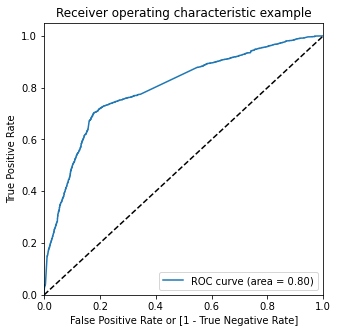

In [100]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.Convert_Prob)

# Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [101]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,Convert_Prob,lead_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.23,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.28,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.26,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.65,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.23,3934,0,1,1,1,0,0,0,0,0,0,0


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.43   0.99   0.08
0.20  0.20      0.56   0.91   0.35
0.30  0.30      0.76   0.73   0.78
0.40  0.40      0.78   0.68   0.83
0.50  0.50      0.76   0.58   0.87
0.60  0.60      0.74   0.48   0.91
0.70  0.70      0.72   0.35   0.94
0.80  0.80      0.68   0.21   0.97
0.90  0.90      0.67   0.15   0.99


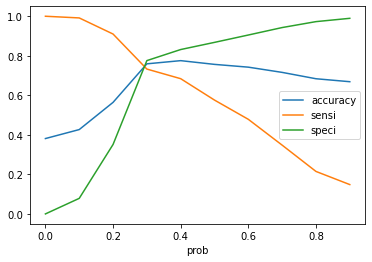

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,converted,Convert_Prob,lead_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.23,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.28,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.26,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.65,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.23,3934,0,1,1,1,0,0,0,0,0,0,0,0


# Assigning Lead Score

In [105]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,converted,Convert_Prob,lead_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.23,1871,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.28,6795,0,1,1,1,0,0,0,0,0,0,0,0,28
2,0,0.26,3516,0,1,1,1,0,0,0,0,0,0,0,0,26
3,0,0.65,8105,1,1,1,1,1,1,1,1,0,0,0,1,65
4,0,0.23,3934,0,1,1,1,0,0,0,0,0,0,0,0,23


In [106]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3328,  674],
       [ 779, 1687]])

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6841038118410381

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8315842078960519

In [110]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16841579210394803


In [111]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7145277424819991


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8103238373508643


## Precision and Recall

In [113]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3328  674]
 [ 779 1687]]


##### Precision
TP / TP + FP

In [114]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7145277424819991

##### Recall
TP / TP + FN

In [115]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6841038118410381

### Precision and recall tradeoff

In [116]:
from sklearn.metrics import precision_recall_curve

In [117]:
y_train_pred_final.converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.Convert_Prob)

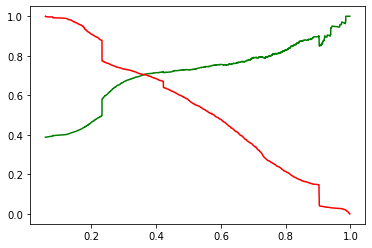

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set


In [120]:
X_test[['total_visits','time_on_website','page_views_per_visit']] = scaler.transform(X_test[['total_visits','time_on_website','page_views_per_visit']])

In [121]:
X_test = X_test[col]
X_test.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference
4269,0,0.86,0.96,2.61,0,0,0,0,0
2376,0,-0.66,-0.89,-1.09,0,0,0,0,1
7766,0,0.29,-0.78,1.23,1,0,0,0,0
9199,0,-0.66,-0.89,-1.09,0,1,0,0,0
4359,0,-0.66,-0.89,-1.09,0,0,0,0,1


In [122]:
X_test_sm = sm.add_constant(X_test)

In [123]:
y_test_pred = res.predict(X_test_sm)

In [124]:
y_test_pred[:10]

4269   0.44
2376   0.90
7766   0.16
9199   0.23
4359   0.90
9186   0.35
1631   0.55
8963   0.26
8007   0.27
5324   0.21
dtype: float64

In [125]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.44
2376,0.90
7766,0.16
9199,0.23
4359,0.90


In [126]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [127]:
# Putting CustID to index
y_test_df['lead_number'] = y_test_df.index

In [128]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
y_pred_final.head()

,converted,lead_number,0
0,1,4269,0.44
1,1,2376,0.90
2,1,7766,0.16
3,0,9199,0.23
4,1,4359,0.90


In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['lead_number','converted','Convert_Prob'], axis=1)
y_pred_final.head()

,lead_number,converted,Convert_Prob
0,4269,1,0.44
1,2376,1,0.90
2,7766,1,0.16
3,9199,0,0.23
4,4359,1,0.90


In [131]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [132]:
y_pred_final.head()

,lead_number,converted,Convert_Prob,final_predicted
0,4269,1,0.44,1
1,2376,1,0.90,1
2,7766,1,0.16,0
3,9199,0,0.23,0
4,4359,1,0.90,1


## Assign LEAD SCORE to test set

In [133]:
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,lead_number,converted,Convert_Prob,final_predicted,Lead_Score
0,4269,1,0.44,1,44
1,2376,1,0.90,1,90
2,7766,1,0.16,0,16
3,9199,0,0.23,0,23
4,4359,1,0.90,1,90


In [134]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted)

0.7709235209235209

In [135]:
confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
confusion2

array([[1392,  285],
       [ 350,  745]])

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.680365296803653

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.8300536672629696

# THANK YOU